In [1]:
import chaosmagpy


In [17]:
import chaosmagpy as cp
import matplotlib.pyplot as plt
import numpy as np

model = cp.load_gufm1_txtfile('./gufm1')  # load model txt-file
times = np.arange(1590, 1990+1, 1)
radius = 3485.0  # km, here core-mantle boundary
theta = np.linspace(0., 180., num=181)  # colatitude in degrees
phi = np.linspace(-180., 180., num=361)  # longitude in degrees

Br = np.zeros( (theta.size, phi.size, times.size)) # This is the dataset
for index, time in enumerate(times):
    mjd = cp.data_utils.dyear_to_mjd(time, leap_year=False)
    Br[:,:,index], _, _ = model.synth_values(mjd, radius, theta, phi, grid=True)

# save Br if needed.


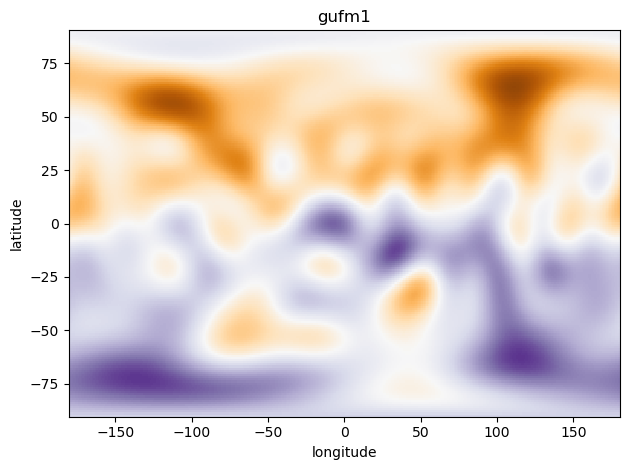

In [18]:
# make a simple plot of one time-slice

fig, ax = plt.subplots(1)
ax.pcolormesh(phi, 90. - theta, Br[:,:,-30], cmap='PuOr', vmin=-1e6,
                       vmax=1e6)
ax.set_title('gufm1')
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')


plt.tight_layout()
plt.show()

In [19]:
Br.shape

(181, 361, 401)

In [20]:
np.savez('Mag_field_1550-1990.npz',Br,phi,theta,times,radius)